### Prueba 1 - Hito 1 - Javier Rojas Benitez - G56

# Preliminares

- Este es un problema de clasificacion. En especifico, corresponde a un problema de clasificacion
binaria. Esto, ya que se quiere clasificar si un cuerpo de texto tiene un sentimiento negativo o positivo asociado.

## Variables disponibles

- El vector objetivo (```sentiment```) corresponde al sentimiento asociado a un cuerpo de texto.
Existen diversos sentimientos disponibles. Sin embargo, esta variable sera codificada a una variable
binaria (Positivo o Negativo). La codificacion esta explicada en el apartado de preprocesamiento.

- Las variables independientes corresponden a todas las palabras disponibles en cada cuerpo de texto.
Sin embargo, una parte importante de estas palabras seran filtradas luego del preprocesamiento 
(eliminacion de palabras "stopwords", consolidacion de palabras con una raiz comun). Por lo tanto,
los atributos disponibles son las palabras remanentes en los cuerpos de texto luego del preprocesamiento.

## Resolución del problema

- Como se menciono previamente, este es un problema de clasificacion. En este caso, se relaciona
el contenido de un texto con el sentimiento (especificamente, si es un sentimiento positivo o negativo)
que este provoca.

- Especificamente, este es un problema de clasificacion binaria (positivo o negativo). Debido a lo
anterior, se utilizaran los siguientes modelos predictivos:

    - Regresion logistica
    - Arbol de Clasificacion
    - Random Forest de Clasificacion
    - SVM
    - Naive Bayes

- Para cada modelo se realizará una búsqueda de hiperparámetros óptimos en grilla. La grilla
utilizada para cada modelo será la siguiente:

```python
{'Regresion logistica': TODO,
 'Arbol de Clasificacion': TODO,
 'Random Forest de Clasificacion': TODO,
 'SVM': TODO,
 'Naive Bayes': TODO}
```

- El flujo general de la resolución del problema será la siguiente:

1. Análisis exploratorio de los datos y preprocesamiento
    1. Analizar la distribucion y valores faltantes del vector objetivo
    2. Recodificar el vector objetivo ([Preprocesamiento vector objetivo](#vector-objetivo))
    3. Analizar la distribucion y valores faltantes del vector objetivo recodificado
    4. Preprocesar todos los cuerpos de texto de la base de datos ([Preprocesar variables independiente](#variables-independientes))
    5. Analizar la distribucion de palabras y valores faltantes de los cuerpos de texto preprocesados


2. Separación de datos en entrenamiento y validación
    1. Se separarán los datos en variables independientes y vector objetivo
    2. Se separarán ambos tipos de variables en datos de entrenamiento y validación (Se utilizará
    el 33.5% de los datos para la validación)

3. Búsqueda de parámetros óptimos para modelos de Machine Learning
    1. Se realizará un GridSearchCV para cada uno de los modelos listado, utilizando la grilla
    adjunta previamente para cada modelo.
    2. Se obtendrán los parámetros óptimos de cada tipo de modelo creado

4. Validación y elección de modelos optimizados
    1. Cada uno de los modelos con sus parámetros optimizados se validará con los datos de
    validación de la división trietápica.
    2. Finalmente, se comparará el desempeño de cada modelo y se elegirá el mejor de todos
    según la métrica de ROC-AUC.


## Preprocesamiento

- Debido a que este es un problema de análisis de textos, es necesario preprocesar los cuerpos de
texto a analizar. Se seguirán los siguientes pasos para realizar el preprocesamiento:

### Variables independientes

1. Se convertirán las letras a lower case (con la función lower)
2. Se filtrarán todas las palabras comúnes (filtrando todas las palabras que existan en la lista
de stopwords de nltk)
3. Se realizará una lemantización de cada cuerpo de texto presente
4. Se creará una matriz de ocurrencias de cada palabra en cada texto con CountVectorizer

### Vector objetivo

1. Se reemplazará cada sentimiento por su codificación a positivo o negativo según el enunciado.
El resultado será asignado a una nueva columna llamada ```sentiment_cod```
2. Los sentimientos neutros seran asignados eligiendo un valor aleatorio entre "Positiva" o "Negativa"
Esto se realizará utilizando la función .choice(list) del módulo random (o sea: ```random.choice(["Positiva", "Negativa"])``` para cada ocurrencia de "neutral"). Esta recodificacion tambien sera
asignada a la columna ```sentiment_cod```
3. Se eliminará de la base de datos la columna original de sentimientos


## Division de muestras

- Una vez realizado todo el preprocesamiento, se dividirá la base de datos en un set de datos de
entrenamiento y de validación. Se utilizará un ***33.5% de los datos para validación***, y ***el otro 66.5%
para entrenar los modelos***

- El set de entrenamiento será utilizado para realizar un GridSearch con Validación Cruzada
para cada modelo (Por lo tanto, se utilizará una división trietápica). Se utilizarán 5 validaciones
cruzadas para cada búsqueda en grilla.


## Métricas de Desempeño

- Debido a que este es un problema de clasificacion, se utilizaran las metricas de recall, precision, accuracy y f1-score. Para obtener todas estas metricas se utilizara la funcion ```classification_report```
de sklearn.metrics. Esta metodología se utilizará al validar los modelos con los datos de validación

- Se utilizará la métrica de ROC-AUC Score para comparar el desempeño entre modelos. El modelo
que tenga el valor más alto de ROC-AUC será el más óptimo.

- Para cada una de las validaciones cruzadas durante del GridSearchCV, se calculará la métrica
de accuracy

## Optimización del Modelo

TODO


# Aspectos Computacionales
- Se utiliza la siguiente version de Python:

    - Python v3.10.9

- Se utilizaran las siguientes librerias:
  - **Para sanitizar el cuadernillo jupyter**:
    - warnings de Python v3.10.9
  
  - **Para leer/manipular bases de datos y calcular diversas estadisticas**:
    - pandas v1.4.4
    - numpy v1.21.5
  
  - **Para graficar datos**:
    - matplotlib v3.5.2
    - seaborn v0.11.2
  
  - **Para observar visualmente valores faltantes**:
    - missingno v0.4.2

  - **Funciones auxiliares (alojadas en los archivos llamado funciones_auxiliares_hito_X.py)**



# Análisis Exploratorio
- Analizar el comportamiento del vector objetivo
- Reportar el patron de datos perdidos

In [23]:
import pandas as pd
import numpy as np
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns

import funciones_auxiliares as aux

import warnings

warnings.filterwarnings('ignore')
sns.set_style()
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
import wget
url = "https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv"
filename = wget.download(url)


In [3]:
df = pd.read_csv('input/training_tweets.csv').drop(columns='Unnamed: 0')

# Análisis de vector objetivo

,Frecuencia,Porcentaje
neutral,6451,0.215033
worry,6337,0.211233
happiness,3952,0.131733
sadness,3869,0.128967
love,2908,0.096933
surprise,1619,0.053967
fun,1331,0.044367
relief,1158,0.038600
hate,975,0.032500
empty,617,0.020567


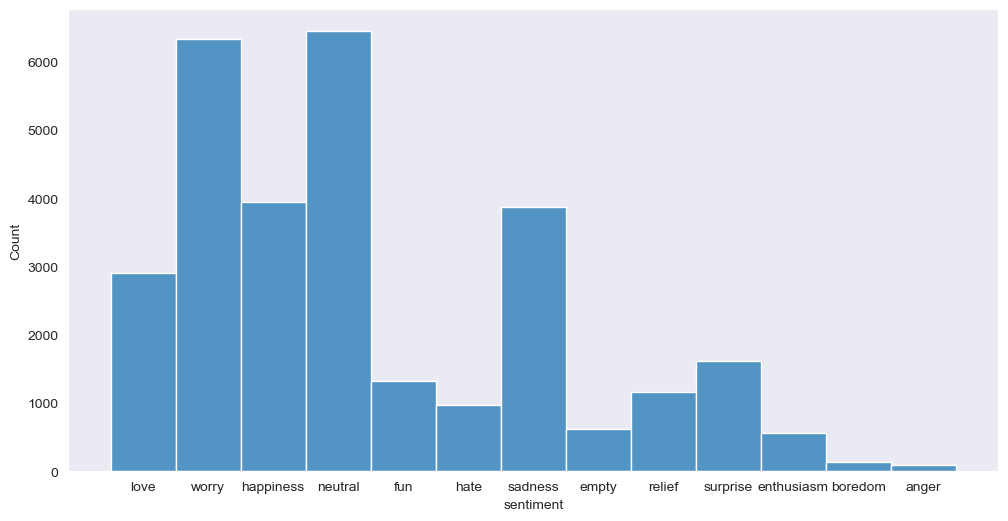

La variable presentó 0 valores faltantes


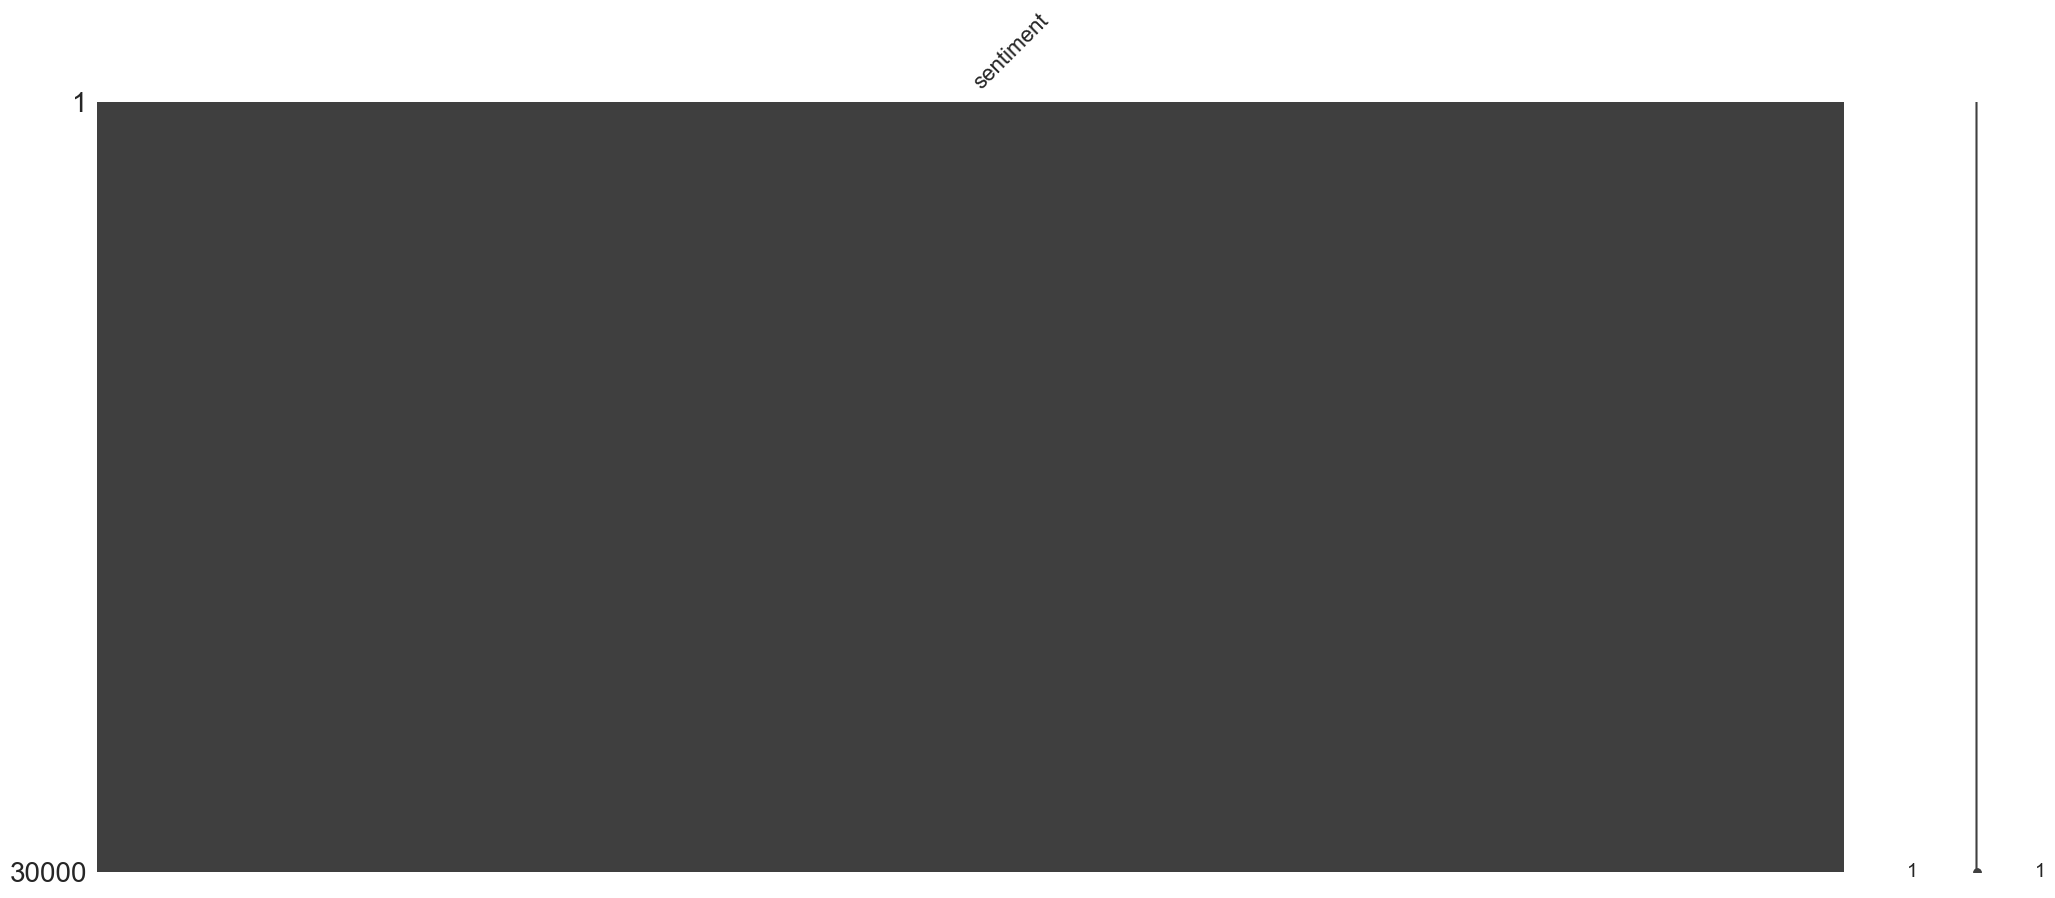

In [25]:
vector_objetivo = df['sentiment']
aux.analizar_vector_objetivo_discreto(vector_objetivo)

- Por lo tanto, la variable presentó una mayor cantidad de textos clasificados como neutrales.
Con una cantidad de 6451 textos neutrales, que corresponden al 21.5% de los textos totales de la
base de datos.

- El sentimiento menos frecuente fue ```anger```, con 89 ocurrencias, lo que representa el 0.3%
de textos en la base de datos.

- El vector objetivo carece de valores faltantes.

# Preprocesamiento

In [29]:
cuerpos_lower = df.content.str.lower()

In [39]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words_ingles = stopwords.words('english')

In [42]:
cuerpo_de_texto_normal = '''
This is a pretty good shiets
'''

In [43]:
word_tokenize(cuerpo_de_texto_normal)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\ppizarro/nltk_data'
    - 'c:\\Users\\ppizarro\\AppData\\Local\\anaconda3\\nltk_data'
    - 'c:\\Users\\ppizarro\\AppData\\Local\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\ppizarro\\AppData\\Local\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ppizarro\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
